#### Cosi 135b Computational Semantics Final Project
# Word2Vec with Friends
#### Zachary Boroda, Sam Brenner, and Ben Bar Zvi

First some important imports

In [1]:
import numpy as np
import pickle
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

Now let us load in and complete our word vectors

In [2]:
context_matrix_co_oc = np.load("trainingoutput/trainingoutput_seed0/context_matrix_training_cooccurrence_book7.npy")
embeddings_matrix_co_oc = np.load("trainingoutput/trainingoutput_seed0/embeddings_matrix_training_cooccurrence_book7.npy")

context_matrix_random = np.load("trainingoutput/trainingoutput_seed0/context_matrix_training_random_book7.npy")
embeddings_matrix_random = np.load("trainingoutput/trainingoutput_seed0/embeddings_matrix_training_random_book7.npy")

final_embeddings_co_oc = embeddings_matrix_co_oc.T #+ context_matrix_co_oc
final_embeddings_random = embeddings_matrix_random.T #+ context_matrix_random

with open('trainingoutput/trainingoutput_random_init/word_dict_book7.pickle', 'rb') as handle:
    word_to_embedding_dict = pickle.load(handle)

df_final_embeddings_co_oc = pd.DataFrame(final_embeddings_co_oc, columns=word_to_embedding_dict)
df_final_embeddings_random = pd.DataFrame(final_embeddings_random, columns=word_to_embedding_dict)
df_final_embeddings_random

,dark,lord,ascending,two,men,appeared,out,nowhere,few,yards,...,boats,bye,friday,sincere,tactful,bravest,kisses,reminders,craned,bereavement
0,-0.203698,0.145982,-0.000363,-0.130432,0.367573,0.277468,0.537931,0.233623,0.477555,0.593752,...,0.840457,0.798690,0.008718,0.421803,0.855276,0.322859,0.173164,0.997038,0.674777,0.363971
1,1.102975,0.633443,0.198979,0.974722,-0.398816,0.666177,0.747732,0.343366,-0.010901,0.829610,...,0.406325,0.494278,0.839274,0.957815,0.275577,0.653165,0.938706,0.758268,0.650442,0.628006
2,-0.663569,1.096935,1.179756,1.228119,1.611477,0.884482,0.898360,1.149205,0.906042,1.105430,...,0.245065,0.765163,0.913709,0.398316,0.665398,0.863762,0.395473,0.787708,0.942418,0.541321
3,0.883863,0.259161,0.586746,0.319935,1.307377,1.576654,1.105722,1.412827,1.033152,0.993755,...,0.716613,0.994788,0.705761,0.165823,0.628582,0.188002,0.075576,0.765198,0.350380,0.827573
4,0.423201,0.634026,0.552997,0.777872,0.269231,-0.911668,0.995079,1.393712,0.389695,2.306917,...,0.715954,0.997062,0.506269,0.127061,0.807709,0.509534,0.858175,0.005055,0.361871,0.486602
5,-0.487330,0.864541,0.747780,0.979545,0.398241,0.991102,0.055299,0.294256,0.935302,0.059482,...,0.992385,0.400257,0.185080,0.497463,0.609237,0.908055,0.837548,0.827825,0.405091,0.757134
6,-0.323615,-0.390911,0.270406,1.035983,0.714090,0.263475,0.735666,-0.099098,0.245686,-0.582896,...,0.300747,0.292884,0.617350,0.919448,0.928441,0.097718,0.404043,0.295829,0.901243,0.726259
7,0.043875,1.065741,0.041915,0.150670,-0.243127,1.058907,0.720894,1.490476,1.730216,0.917469,...,0.177587,0.881523,0.105774,0.547021,0.787812,0.175163,0.845099,0.251150,0.396433,0.118463
8,0.746619,1.761496,0.877988,0.463857,1.496944,0.816779,0.623490,0.663266,0.625888,0.486123,...,0.837480,0.704755,0.928973,0.142537,0.305520,0.554136,0.125036,0.205267,0.244676,0.744657
9,0.978662,0.178035,0.365275,0.397591,0.529850,0.389736,-0.024682,-0.024878,0.206527,0.166328,...,0.976760,0.443394,0.699053,0.477764,0.123533,0.141871,0.649302,0.603172,0.345094,0.152905


Now lets see how similar Harry and Voldemort are in the two different sets of embeddings

In [3]:
def cosign_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print(cosign_similarity(df_final_embeddings_co_oc['harry'], df_final_embeddings_co_oc['malfoy']))

print(cosign_similarity(df_final_embeddings_co_oc['harry'], df_final_embeddings_co_oc['voldemort']))

print(cosign_similarity(df_final_embeddings_random['harry'], df_final_embeddings_random['malfoy']))

print(cosign_similarity(df_final_embeddings_random['harry'], df_final_embeddings_random['voldemort']))


0.1352291551357528
0.5380569665771165
0.32316798801218377
0.591689511490899


In [27]:
def scatter_labels(x, y, labels, title):
    fig, ax = plt.subplots(1,1)
    ax.scatter(x, y)
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i], y[i]))
    ax.set_title(title)
    plt.show()


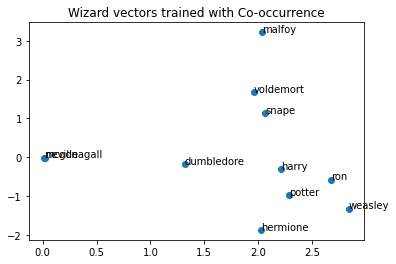

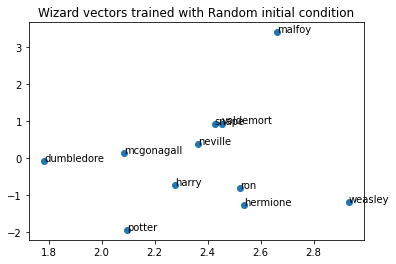

In [29]:
wizardslist = ["harry", "ron", "hermione", "neville", "voldemort", "malfoy", "snape", "dumbledore", "weasley", "potter", "mcgonagall"]

df_wizards_co_oc = df_final_embeddings_co_oc[wizardslist]
df_wizards_random = df_final_embeddings_random[wizardslist]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_wizards_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardslist, "Wizard vectors trained with Co-occurrence")

dimensional_reduced = svd.fit_transform(df_wizards_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardslist, "Wizard vectors trained with Random initial condition")

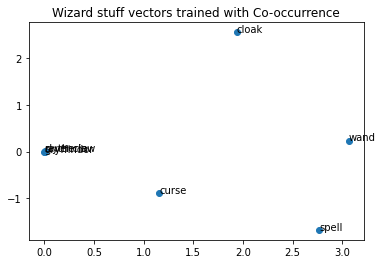

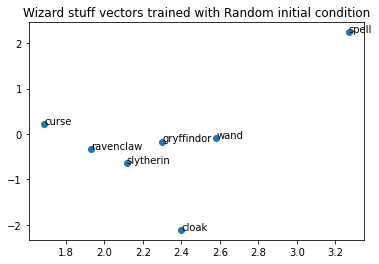

In [33]:
wizardstufflist = ["curse", "spell", "cloak", "wand", "ravenclaw", "slytherin", "gryffindor"]

df_wizardstuff_co_oc = df_final_embeddings_co_oc[wizardstufflist]
df_wizardstuff_random = df_final_embeddings_random[wizardstufflist]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_wizardstuff_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardstufflist, "Wizard stuff vectors trained with Co-occurrence")

dimensional_reduced = svd.fit_transform(df_wizardstuff_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardstufflist, "Wizard stuff vectors trained with Random initial condition")


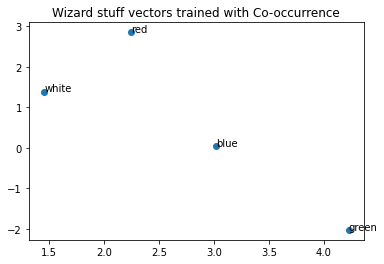

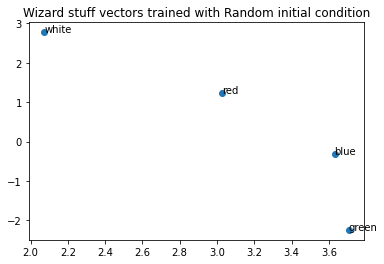

In [35]:
colors = ["green", "red", "blue", "white"]

df_colors_co_oc = df_final_embeddings_co_oc[colors]
df_colors_random = df_final_embeddings_random[colors]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_colors_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], colors, "Wizard stuff vectors trained with Co-occurrence")

dimensional_reduced = svd.fit_transform(df_colors_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], colors, "Wizard stuff vectors trained with Random initial condition")

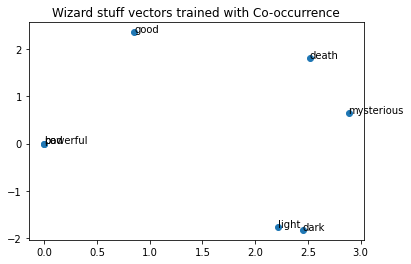

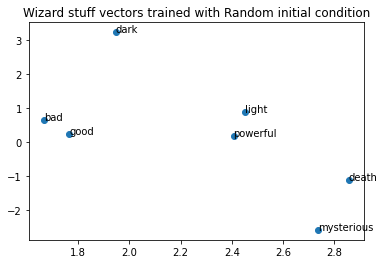

In [36]:
traitlist = ["good", "bad", "dark", "light", "death", "powerful", "mysterious"]

df_traitlist_co_oc = df_final_embeddings_co_oc[traitlist]
df_traitlist_random = df_final_embeddings_random[traitlist]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_traitlist_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], traitlist, "Wizard stuff vectors trained with Co-occurrence")

dimensional_reduced = svd.fit_transform(df_traitlist_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], traitlist, "Wizard stuff vectors trained with Random initial condition")